# Plasma parameters in Earth's magnetosphere

[magnetic reconnection]: https://en.wikipedia.org/wiki/Magnetic_reconnection
[plasmapy.formulary]: https://docs.plasmapy.org/en/stable/formulary/index.html

The [Magnetospheric Multiscale Mission](https://www.nasa.gov/mission_pages/mms/overview/index.html) (MMS) is a constellation of four identical spacecraft. The goal of MMS is to investigate the small-scale physics of [magnetic reconnection] in Earth's magnetosphere. In order to do this, the satellites need to orbit in a tight configuration.  But how tight does the tetrahedron have to be?  Let's use [plasmapy.formulary] to find out.

In [ ]:
import astropy.units as u

from astropy import constants

from plasmapy.formulary import gyroradius, inertial_length

## Contents

1. [Physics background](#Physics-background)
2. [Length scales](#Length-scales)

## Physics background


Magnetic reconnection is the fundamental plasma process that converts stored magnetic energy into kinetic energy, thermal energy, and particle acceleration.  Reconnection powers solar flares and is a key component of geomagnetic storms in Earth's magnetosphere. Reconnection can also degrade confinement in fusion devices such as tokamaks. 

In the classical Sweet-Parker model, reconnection occurs when oppositely directed magnetic fields are pressed towards each other in a plasma in an elongated current sheet. The reconnection rate is slow because of the bottleneck associated with conservation of mass.

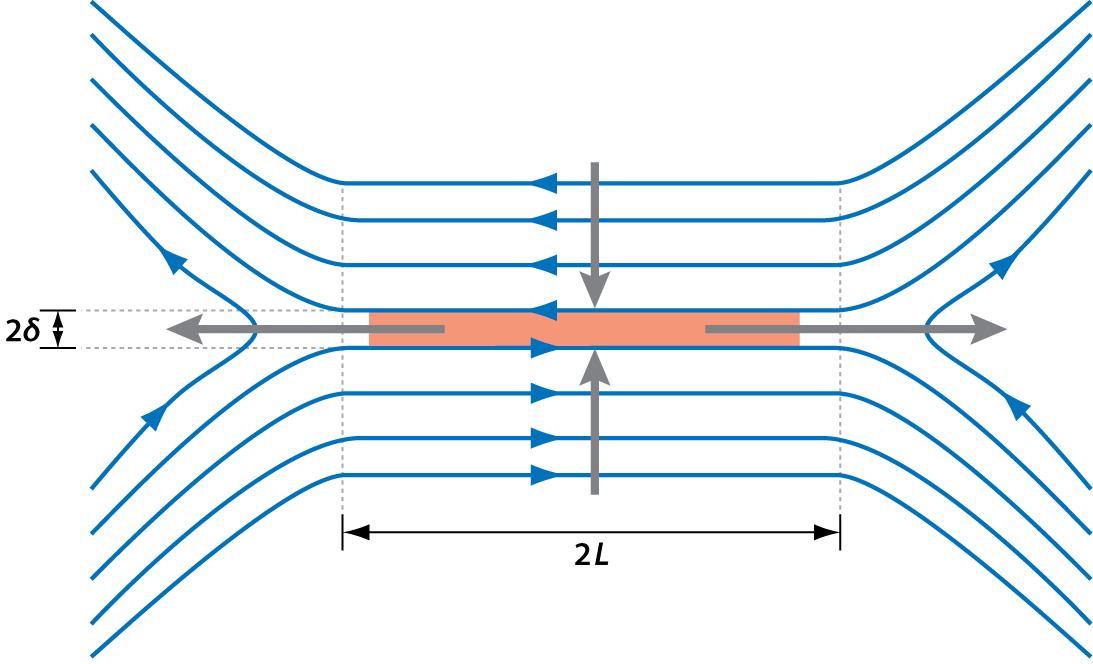

Resistivity is the mechanism that allows field line slippage in the Sweet-Parker model.  However, the resistivity of space plasma is too low to allow fast reconnection to occur. In order to explain fast reconnection in Earth's magnetosphere, it is necessary to invoke additional terms in the generalized Ohm's law:

$$ 
   \mathbf{E} + \mathbf{V} × \mathbf{B}
   = \underbrace{η\mathbf{J}}_\mbox{resistivity} 
   + \underbrace{\frac{\mathbf{J} × \mathbf{B}}{n_e e}}_{\mbox{Hall term}} 
   + \underbrace{\frac{∇·\mathrm{P}_e}{n_e e}}_{\mbox{Elec.~pressure}}
   + \dots
$$

Here, 
$\mathbf{E}$ is the electric field,
$\mathbf{B}$ is the magnetic field,
$\mathbf{V}$ is the velocity,
$\mathbf{J}$ is the current density,
$η$ is the resistivity,
$n_e$ is the electron number density,
$e$ is the fundamental positive charge, and
$\mathrm{P}_e$ is the electron pressure tensor.

The Hall term becomes important on scales shorter than the ion inertial length, $d_i ≡ c/ω_{pi}$, where $ω_{ps}$ is the plasma frequency for species $s$.  When the Hall effect is important, the electrons and ions decouple from each other. During reconnection, the Hall effect leads to an outer ion diffusion of length $d_i$ and an inner diffusion region about the size of the electron inertial length, $d_e ≡ c/ω_{pe}$. Similarly, the electron pressure gradient term becomes important on scales $≲ d_i$.   

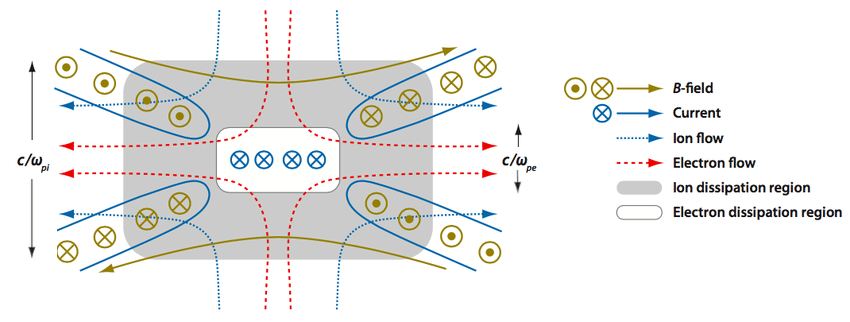

Our goal in this notebook is to calculate $d_i$ and $d_e$ to get an idea of how far the MMS spacecraft should be separated from each other.

## Length scales

Let's choose some characteristic plasma parameters for the magnetosphere.

In [ ]:
n = 1 * u.cm**-3
B = 5 * u.nT
T = 10**4.5 * u.K

Let's calculate the ion inertial length, $d_i$. On length scales shorter than $d_i$, the Hall effect becomes important as the ions and electrons decouple from each other.

In [ ]:
inertial_length(n=n, particle="p+").to("km")

The ion diffusion regions should therefore be a few hundred kilometers thick. Let's calculate the electron inertial length next.

In [ ]:
inertial_length(n=n, particle="e-").to("km")

The electron diffusion region should therefore have a characteristic length scale of a few kilometers, which is significantly smaller than the ion diffusion region. 

We can also calculate the gyroradii for different protons and electrons based on the thermal velocity.

In [ ]:
gyroradius(B=B, particle="p+", T=T).to("km")

In [ ]:
gyroradius(B=B, particle="e-", T=T).to("km")

The four MMS spacecraft have separations of ten to hundreds of kilometers, and thus are well-positioned to investigate Hall physics during reconnection in the magnetosphere.

The images from this notebook are adapted from [Zweibel & Yamada (2009)](https://doi.org/10.1146/annurev-astro-082708-101726).